In [107]:
import pandas as pd
import numpy as np
import nltk

In [108]:
df = pd.read_csv("C:/Users/HP/Desktop/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

In [109]:
df.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3948
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4971
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title            13
reviews.username          0
sourceURLs                0
dtype: int64

In [110]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [111]:
df_1 = df[["reviews.text","reviews.rating"]]

In [112]:
df_1.head()

,reviews.text,reviews.rating
0,I thought it would be as big as small paper bu...,3
1,This kindle is light and easy to use especiall...,5
2,Didnt know how much i'd use a kindle so went f...,4
3,I am 100 happy with my purchase. I caught it o...,5
4,Solid entry level Kindle. Great for kids. Gift...,5


In [113]:
corpus_1 = df_1["reviews.text"].tolist()

In [114]:
corpus_1

['I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.',
 'This kindle is light and easy to use especially at the beach!!!',
 "Didnt know how much i'd use a kindle so went for the lower end. im happy with it, even if its a little dark",
 "I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages. The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books. I finish one and start another, without having to go store. It serves all my needs. I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit. A simple book light from the Dollar tree solves that issue. This is my seco

In [115]:
from nltk.corpus import stopwords
from string import punctuation

In [117]:
removal_stuff = list(stopwords.words("english"))+list(punctuation)

TypeError: 'list' object is not callable

In [118]:
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
lanc_stem = LancasterStemmer()
stem = LancasterStemmer()

In [119]:
resulting_corpus= []
for i in range(len(corpus_1)):
    text = word_tokenize(corpus_1[i].lower())
    text = [lanc_stem.stem(y) for y in text if y not in removal_stuff]
    sentence = " ".join(text)
    
    resulting_corpus.append(sentence)

In [120]:
df_2 = pd.DataFrame(resulting_corpus)

In [121]:
df_2["reviews.rating"] = df_1["reviews.rating"]

In [122]:
df_2.head()

,0,reviews.rating
0,thought would big smal pap turn lik palm think...,3
1,kindl light easy us espec beach,5
2,didnt know much 'd us kindl went low end im ha...,4
3,100 happy purchas caught sal real good pric no...,5
4,solid entry level kindl gre kid gift kid frien...,5


In [123]:
df_2.columns = ["reviews.text", "reviews.rating"]

In [124]:
df_2.head()

,reviews.text,reviews.rating
0,thought would big smal pap turn lik palm think...,3
1,kindl light easy us espec beach,5
2,didnt know much 'd us kindl went low end im ha...,4
3,100 happy purchas caught sal real good pric no...,5
4,solid entry level kindl gre kid gift kid frien...,5


In [125]:
resulting_corpus_2= []
for i in range(len(resulting_corpus)):
    text = word_tokenize(resulting_corpus[i])
    tag = nltk.pos_tag(text)
    adj_tags = ["JJ", "JJR", "JJS"]
    close_adj = [a[0] for a in tag if a[1] in adj_tags]
    sentence = " ".join(text)
    resulting_corpus_2.append(sentence)

In [126]:
resulting_corpus_2

['thought would big smal pap turn lik palm think smal read ... comfort regul kindl would definit recommend paperwhit instead',
 'kindl light easy us espec beach',
 "didnt know much 'd us kindl went low end im happy ev littl dark",
 "100 happy purchas caught sal real good pric norm real book person 1 year old lov rip pag kindl prev 's extrem port fit bet purs giant book load lot book fin on start anoth without go stor serv nee pick on paperwhit pric unb diff could see on n't backlit simpl book light doll tre solv issu second kindl first old keyboard model put fel lov keyboard lol lik wo n't last",
 'solid entry level kindl gre kid gift kid friend lov us read ipad battery good high model bit bet',
 "mak excel ebook read n't expect much dev exceiv read bas ebook good thing 's cheap good read sun",
 'ord daught black paperwhit lov read quit bit larg book driv crazy hold lay want tak book vac lug around thick paperback throw bag read anywh light weight easy us battery lif last week mak arou

In [127]:
list = []
for i in range (len(resulting_corpus)):
    counted = dict()
    word_count = resulting_corpus[i].split(" ")
    
    for words in word_count:
        if words in counted:
            counted[words] += 1
        else:
            counted[words] = 1
    list.append(counted)

In [133]:
word_count

['ste', '8', 'gb', 'model', 'well.this', 'punch..']

In [134]:
counted

{'ste': 1, '8': 1, 'gb': 1, 'model': 1, 'well.this': 1, 'punch..': 1}

In [135]:
list

[{'thought': 1,
  'would': 2,
  'big': 1,
  'smal': 2,
  'pap': 1,
  'turn': 1,
  'lik': 1,
  'palm': 1,
  'think': 1,
  'read': 1,
  '...': 1,
  'comfort': 1,
  'regul': 1,
  'kindl': 1,
  'definit': 1,
  'recommend': 1,
  'paperwhit': 1,
  'instead': 1},
 {'kindl': 1, 'light': 1, 'easy': 1, 'us': 1, 'espec': 1, 'beach': 1},
 {'didnt': 1,
  'know': 1,
  'much': 1,
  "'d": 1,
  'us': 1,
  'kindl': 1,
  'went': 1,
  'low': 1,
  'end': 1,
  'im': 1,
  'happy': 1,
  'ev': 1,
  'littl': 1,
  'dark': 1},
 {'100': 1,
  'happy': 1,
  'purchas': 1,
  'caught': 1,
  'sal': 1,
  'real': 2,
  'good': 1,
  'pric': 2,
  'norm': 1,
  'book': 4,
  'person': 1,
  '1': 1,
  'year': 1,
  'old': 2,
  'lov': 2,
  'rip': 1,
  'pag': 1,
  'kindl': 2,
  'prev': 1,
  "'s": 1,
  'extrem': 1,
  'port': 1,
  'fit': 1,
  'bet': 1,
  'purs': 1,
  'giant': 1,
  'load': 1,
  'lot': 1,
  'fin': 1,
  'on': 3,
  'start': 1,
  'anoth': 1,
  'without': 1,
  'go': 1,
  'stor': 1,
  'serv': 1,
  'nee': 1,
  'pick': 1,
  'p

In [136]:
df_3 = pd.DataFrame(pd.Series(list).reset_index()).set_axis(['Key','Value'],1,inplace=False)

In [137]:
df_2["Adjectives_count"] = df_3["Value"]

In [138]:
df_2

,reviews.text,reviews.rating,Adjectives_count
0,thought would big smal pap turn lik palm think...,3,"{'thought': 1, 'would': 2, 'big': 1, 'smal': 2..."
1,kindl light easy us espec beach,5,"{'kindl': 1, 'light': 1, 'easy': 1, 'us': 1, '..."
2,didnt know much 'd us kindl went low end im ha...,4,"{'didnt': 1, 'know': 1, 'much': 1, ''d': 1, 'u..."
3,100 happy purchas caught sal real good pric no...,5,"{'100': 1, 'happy': 1, 'purchas': 1, 'caught':..."
4,solid entry level kindl gre kid gift kid frien...,5,"{'solid': 1, 'entry': 1, 'level': 1, 'kindl': ..."
5,mak excel ebook read n't expect much dev excei...,5,"{'mak': 1, 'excel': 1, 'ebook': 2, 'read': 3, ..."
6,ord daught black paperwhit lov read quit bit l...,5,"{'ord': 1, 'daught': 2, 'black': 1, 'paperwhit..."
7,bought kindl 2 month ago battery already dead ...,4,"{'bought': 1, 'kindl': 1, '2': 1, 'month': 1, ..."
8,amazon kindl alway best ebook upgrad every new...,5,"{'amazon': 1, 'kindl': 1, 'alway': 1, 'best': ..."
9,'s beyond expect ev show mus scor fast turn th...,5,"{''s': 1, 'beyond': 1, 'expect': 1, 'ev': 1, '..."


In [139]:
!pip install textblob
from textblob import TextBlob

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [140]:
polarity = []
for i in range(len(resulting_corpus)):
    text = TextBlob(resulting_corpus[i]).sentiment
    sentence = " ".join(str(text))
    polarity.append(sentence)

In [141]:
polarity

['S e n t i m e n t ( p o l a r i t y = 0 . 0 ,   s u b j e c t i v i t y = 0 . 1 )',
 'S e n t i m e n t ( p o l a r i t y = 0 . 4 1 6 6 6 6 6 6 6 6 6 6 6 6 6 7 ,   s u b j e c t i v i t y = 0 . 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 )',
 'S e n t i m e n t ( p o l a r i t y = 0 . 2 1 2 5 ,   s u b j e c t i v i t y = 0 . 4 7 5 )',
 'S e n t i m e n t ( p o l a r i t y = 0 . 3 3 7 4 9 9 9 9 9 9 9 9 9 9 9 9 7 ,   s u b j e c t i v i t y = 0 . 4 8 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 )',
 'S e n t i m e n t ( p o l a r i t y = 0 . 2 8 6 6 6 6 6 6 6 6 6 6 6 6 6 7 ,   s u b j e c t i v i t y = 0 . 4 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 )',
 'S e n t i m e n t ( p o l a r i t y = 0 . 4 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 4 ,   s u b j e c t i v i t y = 0 . 5 2 5 )',
 'S e n t i m e n t ( p o l a r i t y = - 0 . 0 0 4 7 6 1 9 0 4 7 6 1 9 0 4 7 5 3 ,   s u b j e c t i v i t y = 0 . 5 4 4 0 4 7 6 1 9 0 4 7 6 1 9 1 )',
 'S e n t i m e n t ( p o l a r i t y = - 0 . 2 ,   s u b j e c t i v i t y = 0 . 4 )',
 'S e n t i 

In [142]:
df_4 = pd.DataFrame(pd.Series(polarity).reset_index())

In [143]:
df_4.columns = ["index","polarity"]

In [144]:
df_2["polarity"]=df_4["polarity"]

In [145]:
df_2.columns = ["description","rating","adjectives_count","polarity"]
df_2.head()

,description,rating,adjectives_count,polarity
0,thought would big smal pap turn lik palm think...,3,"{'thought': 1, 'would': 2, 'big': 1, 'smal': 2...","S e n t i m e n t ( p o l a r i t y = 0 . 0 , ..."
1,kindl light easy us espec beach,5,"{'kindl': 1, 'light': 1, 'easy': 1, 'us': 1, '...",S e n t i m e n t ( p o l a r i t y = 0 . 4 1 ...
2,didnt know much 'd us kindl went low end im ha...,4,"{'didnt': 1, 'know': 1, 'much': 1, ''d': 1, 'u...",S e n t i m e n t ( p o l a r i t y = 0 . 2 1 ...
3,100 happy purchas caught sal real good pric no...,5,"{'100': 1, 'happy': 1, 'purchas': 1, 'caught':...",S e n t i m e n t ( p o l a r i t y = 0 . 3 3 ...
4,solid entry level kindl gre kid gift kid frien...,5,"{'solid': 1, 'entry': 1, 'level': 1, 'kindl': ...",S e n t i m e n t ( p o l a r i t y = 0 . 2 8 ...


In [146]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


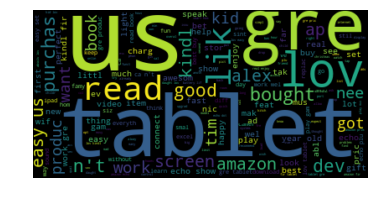

In [147]:
text = " ".join(review for review in df_2.description)


word_cloud = WordCloud().generate(text)


plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()